In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 18})

In [5]:
# Load the data
data = np.load('DataSet/Features_Diff_0.npz')

Features = np.load(f'DataSet/Features_Diff_1.npz')['Features_Diff_1']
print(Features.shape)


(151839, 71, 8)


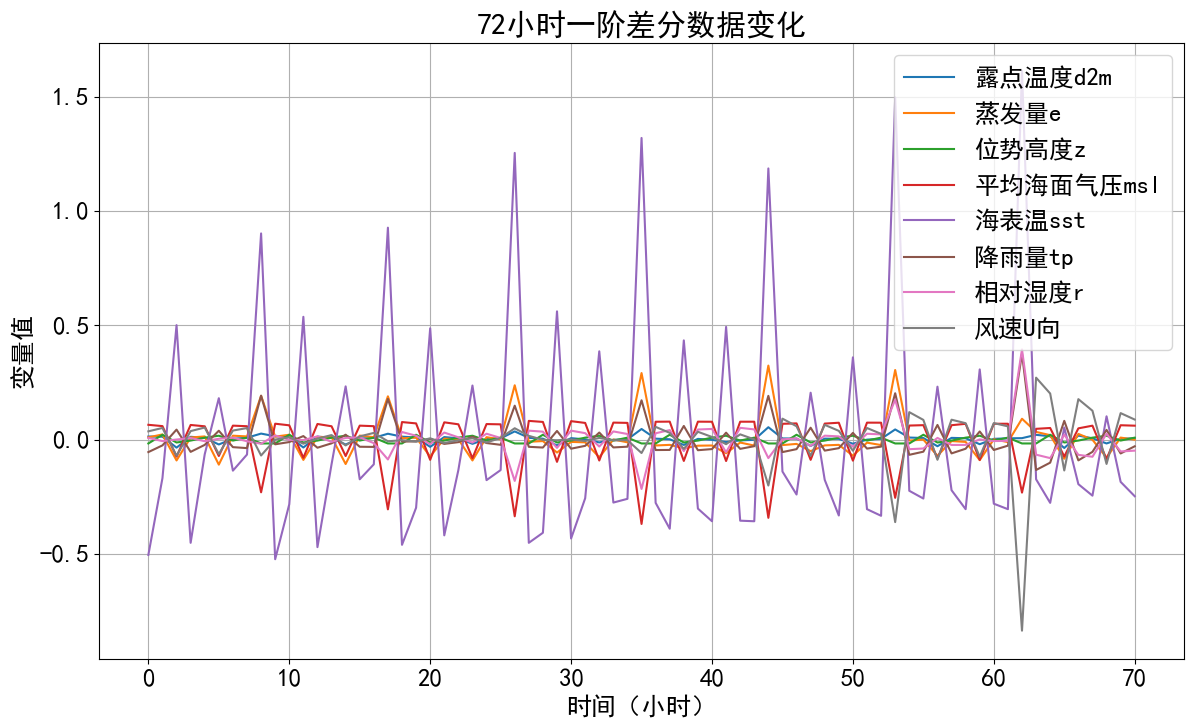

In [7]:
# 提取第6个样本的所有特征
first_sample_features = Features[6, :, :]

# 设置图表大小
plt.figure(figsize=(14, 8))
variable_names = ['露点温度d2m', '蒸发量e','位势高度z','平均海面气压msl','海表温sst', '降雨量tp','相对湿度r','风速U向','风速V向']
# 绘制每个特征随时间变化的曲线
for feature_idx in range(first_sample_features.shape[1]):
    plt.plot(first_sample_features[:, feature_idx], label=f'{variable_names[feature_idx]}')

plt.grid(True)
# 设置图例
plt.legend()
# 设置x轴和y轴标签
plt.xlabel('时间（小时）')
plt.ylabel('变量值')
# 设置标题
plt.title('72小时一阶差分数据变化')
# 显示图表
plt.show()

In [17]:
# 取9000条数据测试样本平稳性
Test_Data = Features[0:9000, :, :]

Element_Dict = {'0':0, '1':0, '2':0,'3':0,
                '4':0,'5':0,'6':0,'7':0,'8':0}

# 计算每个特征的平稳性
results = []
for feature_idx in range(Test_Data.shape[2]):
    non_stationary_count = 0
    for sample_idx in range(Test_Data.shape[0]):
        series = Test_Data[sample_idx, :, feature_idx]
        if np.all(series == series[0]):  # 检查序列是否为常数
            continue  # 如果是常数，则跳过ADF测试
        result = adfuller(series, autolag='AIC')
        p_value = result[1]
        if p_value >= 0.05:  # 使用显著性水平0.05
            Element_Dict[str(feature_idx)] += 1
            non_stationary_count += 1
    results.append(non_stationary_count)

# 输出非平稳特征的数量
non_stationary_features = [i for i, count in enumerate(results) if count > (Test_Data.shape[0] / 2)]  # 大多数样本非平稳
print(f"非平稳特征的索引: {non_stationary_features}")
print(f"非平稳特征的数量: {len(non_stationary_features)}")

KeyboardInterrupt: 

In [42]:
print(Element_Dict)

{'0': 8440, '1': 8572, '2': 0, '3': 8861, '4': 2174, '5': 6987, '6': 8402, '7': 8675, '8': 8688}
